In [2]:
import warnings
warnings.filterwarnings('ignore')

0 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
1 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2 [0, 1, 2, 3, 4, 5, 6, 8, 9]
3 [0, 1, 4, 9]
4 []


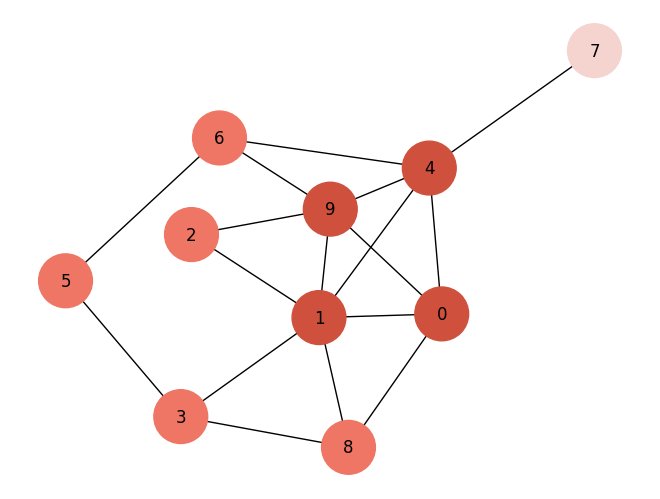

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.gnp_random_graph(n=10, p=.3)

color_map = []
possible_colors = ['#fbedeb', '#f5d3ce', '#ef7564', '#cf513d', '#6e2f1a']
for node in G.nodes():
    node_rank = nx.core_number(G)[node]
    color_map.append(possible_colors[node_rank])

for k in range(0, len(possible_colors)):
    print(k, nx.k_core(G,k=k).nodes())

nx.draw(G, with_labels=True, node_color = color_map, node_size=1500)
plt.show()


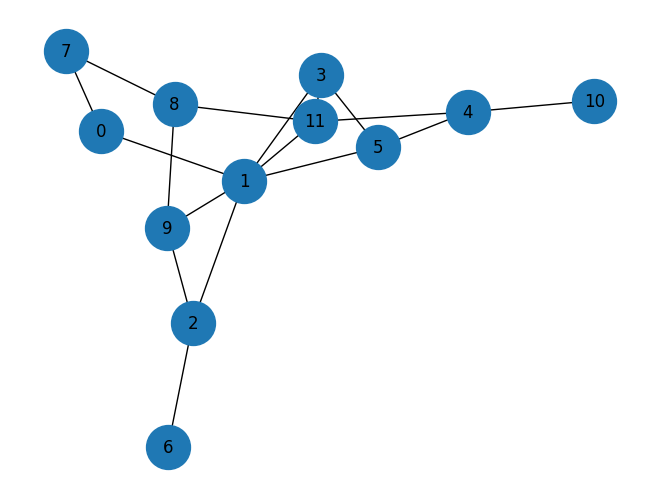

(0, 2) -> 0.250
(0, 3) -> 0.250
(0, 5) -> 0.250
(0, 8) -> 0.250
(0, 9) -> 0.250
(0, 11) -> 0.200
(1, 4) -> 0.286
(1, 6) -> 0.167
(1, 7) -> 0.143
(1, 8) -> 0.286
(2, 3) -> 0.200
(2, 5) -> 0.200
(2, 8) -> 0.200
(2, 11) -> 0.167
(3, 4) -> 0.500
(3, 8) -> 0.200
(3, 9) -> 0.200
(4, 8) -> 0.200
(5, 9) -> 0.200
(5, 10) -> 0.333
(5, 11) -> 0.750
(6, 9) -> 0.333
(7, 9) -> 0.250
(7, 11) -> 0.200
(9, 11) -> 0.400
(10, 11) -> 0.250


In [4]:
import networkx as nx
G = nx.gnp_random_graph(n=12, p=.2)
preds = nx.jaccard_coefficient(G)
nx.draw(G, with_labels=True, node_size=1000)
plt.show()

for u, v, p in preds:
    if p>0:
        print('(%d, %d) -> %.3f' % (u, v, p))


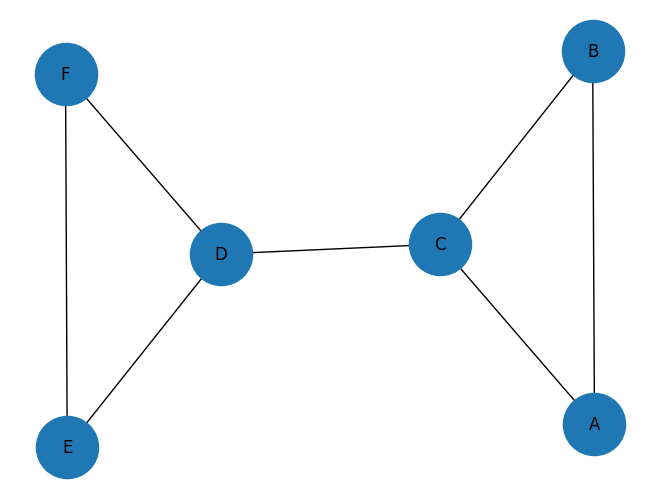

[['A', 'B', 'C'], ['D', 'E', 'F']]


In [5]:
import networkx as nx
from networkx.algorithms import community
#G = nx.gnp_random_graph(n=12, p=.5)

G = nx.Graph()
G.add_edge("A", "B")
G.add_edge("A", "C")
G.add_edge("B", "C")
G.add_edge("D", "E")
G.add_edge("D", "F")
G.add_edge("E", "F")
G.add_edge("C", "D")


nx.draw(G, with_labels=True, node_size=2000)
plt.show()

communities_generator = community.girvan_newman(G)
print(sorted(map(sorted, next(communities_generator))))



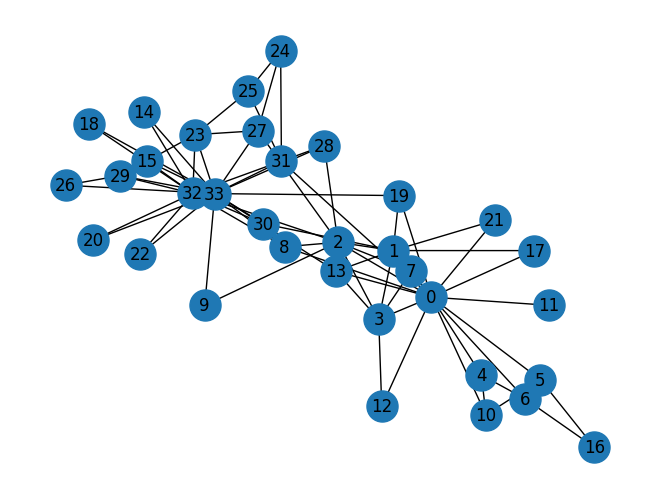

['#DA1754', '#D47CA7']
Community 0 : [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
Community 1 : [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


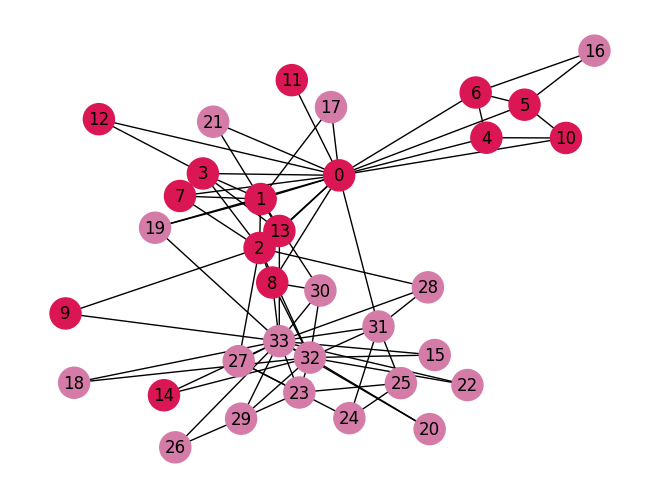

In [6]:
import networkx as nx
from networkx.algorithms import community
import random

G = nx.karate_club_graph()

colors = []
num_of_communities = 2
for i in range(num_of_communities):
    r = lambda: random.randint(0,255)
    colors.append('#%02X%02X%02X' % (r(),r(),r()))

nx.draw(G, with_labels=True, node_size=500)
plt.show()

communities_generator = community.girvan_newman(G)
#communities = sorted(map(sorted, next(communities_generator)))

communities = []
while(len(communities) < num_of_communities):
    communities = sorted(map(sorted, next(communities_generator)))


print(colors)
color_map = {}
color_id = 0
for c in communities:
    print("Community", color_id,":",c)
    for node in c:
        color_map[node] = colors[color_id]
    color_id += 1


nx.draw(G, with_labels=True, node_color = color_map.values(), node_size=500)
